<a href="https://colab.research.google.com/github/Soundaryar1008/Brain_Tumor/blob/main/hotel_booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the dataset
file_path = "/content/hotel_bookings.csv"  # Replace with your actual file path
df = pd.read_csv(file_path)

# Display dataset information
print("Dataset Overview:")
print(df.info())  # Check column types & missing values
print("\nFirst 5 Rows:")
print(df.head())

# Convert date columns (if applicable)
date_columns = ['arrival_date', 'reservation_status_date']  # Adjust as needed
for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col])

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values in Dataset:")
print(missing_values[missing_values > 0])

# Drop duplicates (if any)
df.drop_duplicates(inplace=True)

print("\nPreprocessing Completed!")


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   index                           119390 non-null  int64  
 1   hotel                           119390 non-null  object 
 2   is_canceled                     119390 non-null  int64  
 3   lead_time                       119390 non-null  int64  
 4   arrival_date_year               119390 non-null  int64  
 5   arrival_date_month              119390 non-null  object 
 6   arrival_date_week_number        119390 non-null  int64  
 7   arrival_date_day_of_month       119390 non-null  int64  
 8   stays_in_weekend_nights         119390 non-null  int64  
 9   stays_in_week_nights            119390 non-null  int64  
 10  adults                          119390 non-null  int64  
 11  children                        119386 non-null  float64
 12

<ipython-input-1-5aec628db8dd>:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])



Missing Values in Dataset:
children         4
country        488
agent        16340
company     112593
dtype: int64

Preprocessing Completed!


<ipython-input-2-fb28bda3931e>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])


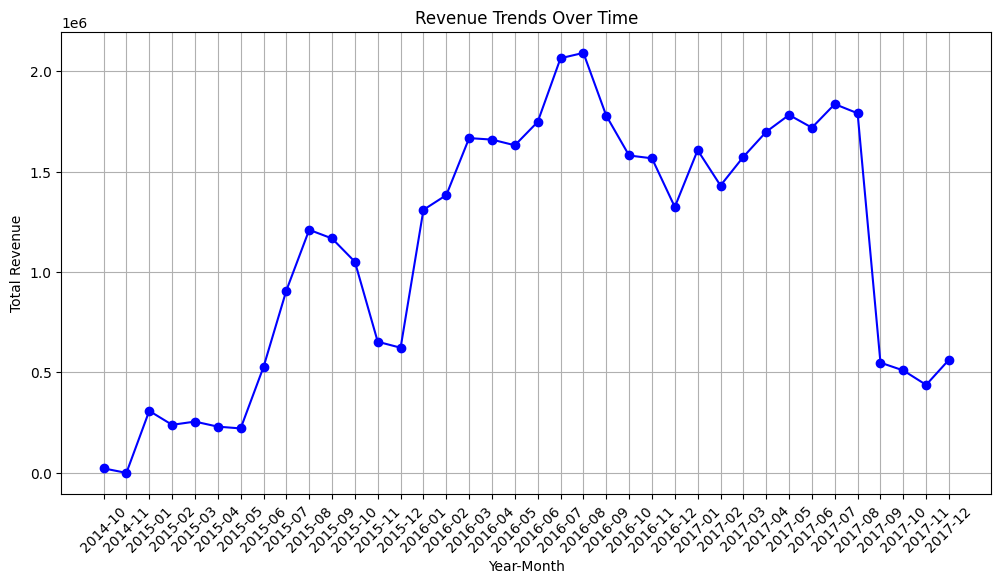

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = "/content/hotel_bookings.csv"  # Update if needed
df = pd.read_csv(file_path)

# Ensure date column is in correct format
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Calculate total revenue per booking
df['total_revenue'] = (df['stays_in_week_nights'] + df['stays_in_weekend_nights']) * df['adr']

# Group revenue by year and month
df['year_month'] = df['reservation_status_date'].dt.to_period('M')
monthly_revenue = df.groupby('year_month')['total_revenue'].sum().reset_index()

# Convert to datetime for plotting
monthly_revenue['year_month'] = monthly_revenue['year_month'].astype(str)

# Plot revenue trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue['year_month'], monthly_revenue['total_revenue'], marker='o', linestyle='-', color='b')
plt.xticks(rotation=45)
plt.xlabel("Year-Month")
plt.ylabel("Total Revenue")
plt.title("Revenue Trends Over Time")
plt.grid(True)
plt.show()


Cancellation Rate: 37.04%


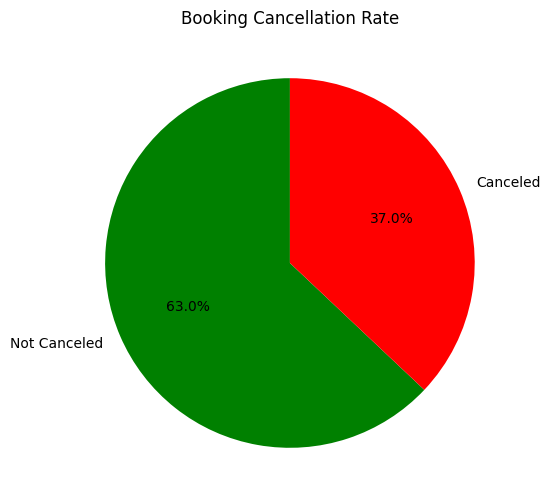

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = "/content/hotel_bookings.csv"
df = pd.read_csv(file_path)

# Count total and canceled bookings
total_bookings = len(df)
canceled_bookings = df['is_canceled'].sum()

# Calculate cancellation rate (%)
cancellation_rate = (canceled_bookings / total_bookings) * 100
print(f"Cancellation Rate: {cancellation_rate:.2f}%")

# Plot Cancellation Distribution
labels = ['Not Canceled', 'Canceled']
sizes = [total_bookings - canceled_bookings, canceled_bookings]
colors = ['green', 'red']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Booking Cancellation Rate")
plt.show()


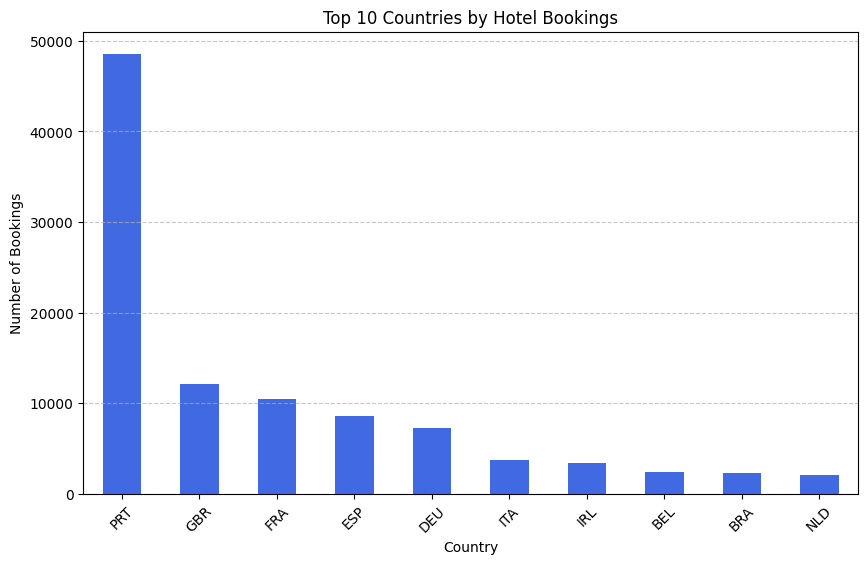

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = "/content/hotel_bookings.csv"
df = pd.read_csv(file_path)

# Count bookings by country
country_counts = df['country'].value_counts()

# Get top 10 countries
top_countries = country_counts.head(10)

# Plot the top countries
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='royalblue')
plt.xlabel("Country")
plt.ylabel("Number of Bookings")
plt.title("Top 10 Countries by Hotel Bookings")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


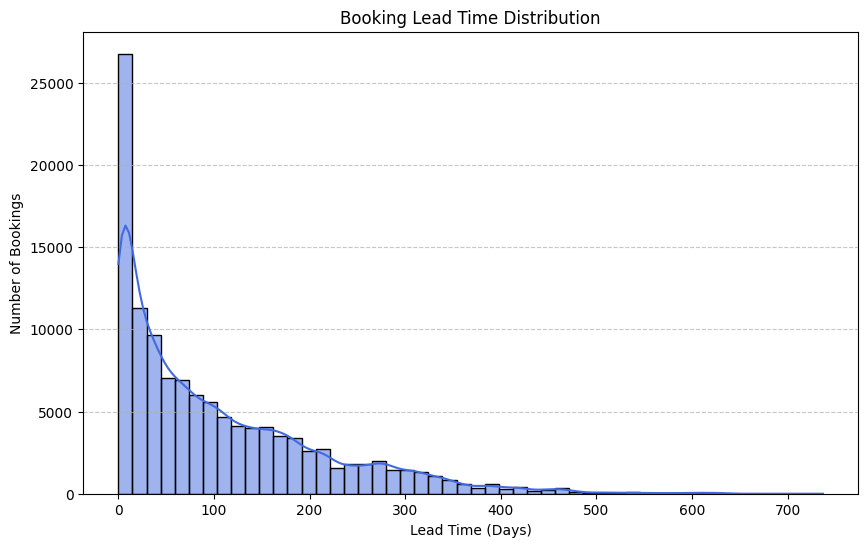

Lead Time Statistics:
count    119390.000000
mean        104.011416
std         106.863097
min           0.000000
25%          18.000000
50%          69.000000
75%         160.000000
max         737.000000
Name: lead_time, dtype: float64


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "/content/hotel_bookings.csv"
df = pd.read_csv(file_path)

# Check lead time distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['lead_time'], bins=50, kde=True, color='royalblue')
plt.xlabel("Lead Time (Days)")
plt.ylabel("Number of Bookings")
plt.title("Booking Lead Time Distribution")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Print basic statistics
print("Lead Time Statistics:")
print(df['lead_time'].describe())


ADDITIONAL ANALYTICS
1 Average Length of Stay .How long do guests stay?
2️ Most Booked Room Type .Which room type is in high demand?
3️ Most Preferred Booking Channel.
 Direct booking, OTA, etc.


📌 Average Length of Stay: 3.43 nights


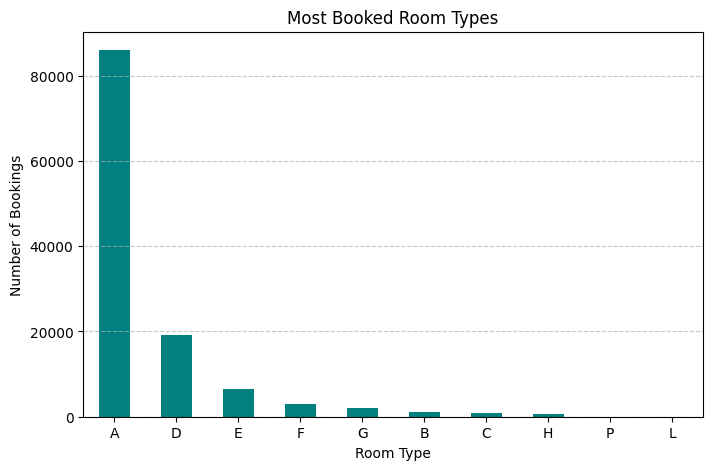

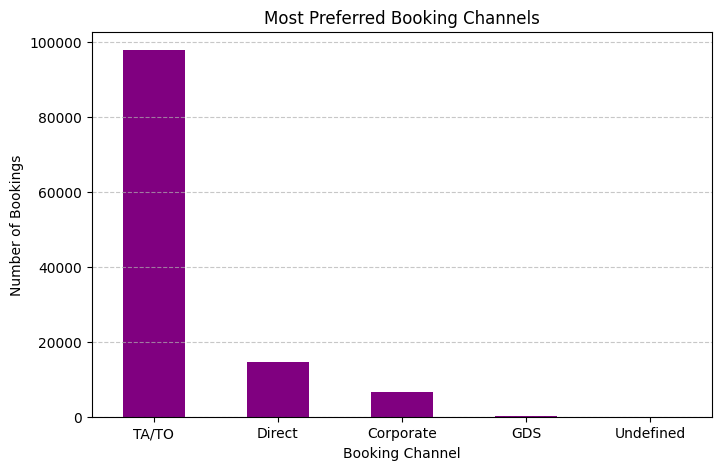

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "/content/hotel_bookings.csv"
df = pd.read_csv(file_path)

# ✅ 1. Average Length of Stay
df['total_nights'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
avg_stay = df['total_nights'].mean()
print(f"📌 Average Length of Stay: {avg_stay:.2f} nights")

# ✅ 2. Most Booked Room Type
room_counts = df['reserved_room_type'].value_counts()
plt.figure(figsize=(8, 5))
room_counts.plot(kind='bar', color='teal')
plt.xlabel("Room Type")
plt.ylabel("Number of Bookings")
plt.title("Most Booked Room Types")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# ✅ 3. Most Preferred Booking Channel
channel_counts = df['distribution_channel'].value_counts()
plt.figure(figsize=(8, 5))
channel_counts.plot(kind='bar', color='purple')
plt.xlabel("Booking Channel")
plt.ylabel("Number of Bookings")
plt.title("Most Preferred Booking Channels")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [7]:
!pip install faiss-cpu sentence-transformers transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 95.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 49.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [8]:
import pandas as pd
from sentence_transformers import SentenceTransformer
import faiss
import numpy as np

# Load dataset
file_path = "/content/hotel_bookings.csv"
df = pd.read_csv(file_path)

# Select relevant columns for Q&A (e.g., reservation details, country, revenue)
df['text_data'] = df.apply(lambda row: f"Booking from {row['country']}, revenue {row['adr']}, lead time {row['lead_time']} days", axis=1)

# Load sentence transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Convert text data into embeddings
embeddings = model.encode(df['text_data'].tolist(), show_progress_bar=True)

# Create FAISS index
dimension = embeddings.shape[1]
index = faiss.IndexFlatL2(dimension)
index.add(np.array(embeddings))

print("✅ FAISS Index Created. Ready for Querying!")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/3731 [00:00<?, ?it/s]

✅ FAISS Index Created. Ready for Querying!


In [9]:
def search_faiss(query, top_k=5):
    query_embedding = model.encode([query])
    distances, indices = index.search(np.array(query_embedding), top_k)

    results = []
    for i in range(top_k):
        idx = indices[0][i]
        results.append(df.iloc[idx]['text_data'])

    return results

# Example Query
query = "Which country has the highest revenue?"
results = search_faiss(query)
print("🔍 Retrieved Results:\n", results)


🔍 Retrieved Results:
 ['Booking from USA, revenue 189.33, lead time 33 days', 'Booking from USA, revenue 189.9, lead time 153 days', 'Booking from USA, revenue 84.33, lead time 133 days', 'Booking from USA, revenue 84.33, lead time 133 days', 'Booking from USA, revenue 84.33, lead time 133 days']
